In [ ]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg, sparse
from scipy.sparse.linalg import eigsh
from scipy.constants import hbar

In [22]:
#Building a function which can solve the equation
alpha = 2
N = 3
dims = 2*N + 1
p = 1
q = 1
m = 3


def V0(alpha, hbar, kL, m):
    E_r = (hbar**2)*(kL**2)/2*m
    potential  =  alpha*E_r
    return potential 

def H_builder(p, q, N, m, V0, kL, use_hbar=True):
    """"
    Build Hamiltonian with n: -N to N
    p- momentum
    q - quasimomentum
    m - mass
    V0 - potential amplitude
    kL - wavevector

    """""
    if not use_hbar:
        hb = 1.0
    else:
        hb = hbar
    
    E_r = (hb**2)*(kL**2)/2*m
    #initialise Hamiltonian matrix
    H = np.zeros((dims,dims), dtype= float)
    for i in range(dims):
        H[i,i] = ((2*i + q)/(hbar*kL))
    
    for j in range (dims - 1):
        H[j, j+1] = -V0/4
        H[j, j-1] = -V0/4
    
    return H


In [23]:
def bloch_wave(u, q, x, p_list):
    """
    Construct Bloch wavefunction ψ(x) = Σ u_n exp(i (p_n + q) x)
    
    u       : eigenvector coefficients (1D array of length dim)
    q       : quasimomentum
    x       : positions where ψ(x) is evaluated (1D array)
    p_list  : array of momenta p_n corresponding to u
    """
    psi = np.zeros_like(x, dtype=complex)
    for n, p in enumerate(p_list):
        psi += u[n] * np.exp(1j * (p + q) * x)
    return psi


In [ ]:
# constructing matrix
H = H_builder(p, q, N, m, V0(alpha, hbar, 1, m), 1, use_hbar=True)

# Example: create a dummy psi vector for demonstration (replace with your actual psi)
psi = np.ones(dims)



array([1.05457182e-34, 3.51523939e-35, 2.10914364e-35, 1.50653117e-35,
       1.17174646e-35, 9.58701652e-36, 8.11209090e-36])

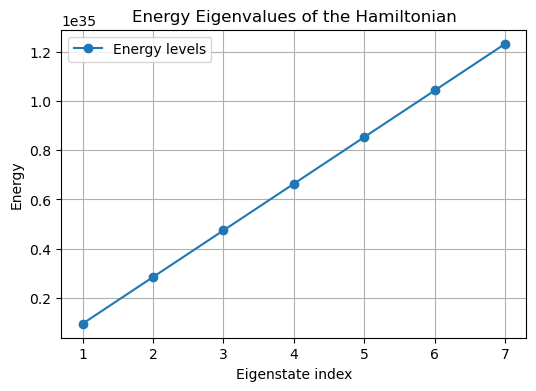

In [30]:
# Compute eigenvalues and eigenvectors of the Hamiltonian
eigvals, eigvecs = np.linalg.eigh(H)

# Plot the eigenvalues (energy levels)
plt.figure(figsize=(6, 4))
plt.plot(range(1, dims+1), eigvals, 'o-', label='Energy levels')
plt.xlabel('Eigenstate index')
plt.ylabel('Energy')
plt.title('Energy Eigenvalues of the Hamiltonian')
plt.grid(True)
plt.legend()
plt.show()